In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage as ndi
from skimage import feature
from skimage import color
from skimage import io

In [5]:
# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

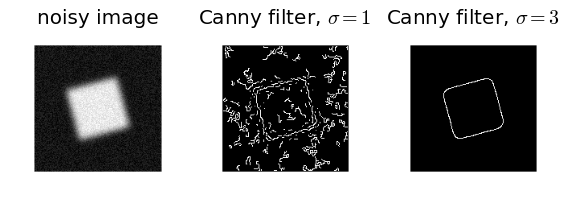

In [6]:
# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

(-0.5, 479.5, 4949.5, -0.5)

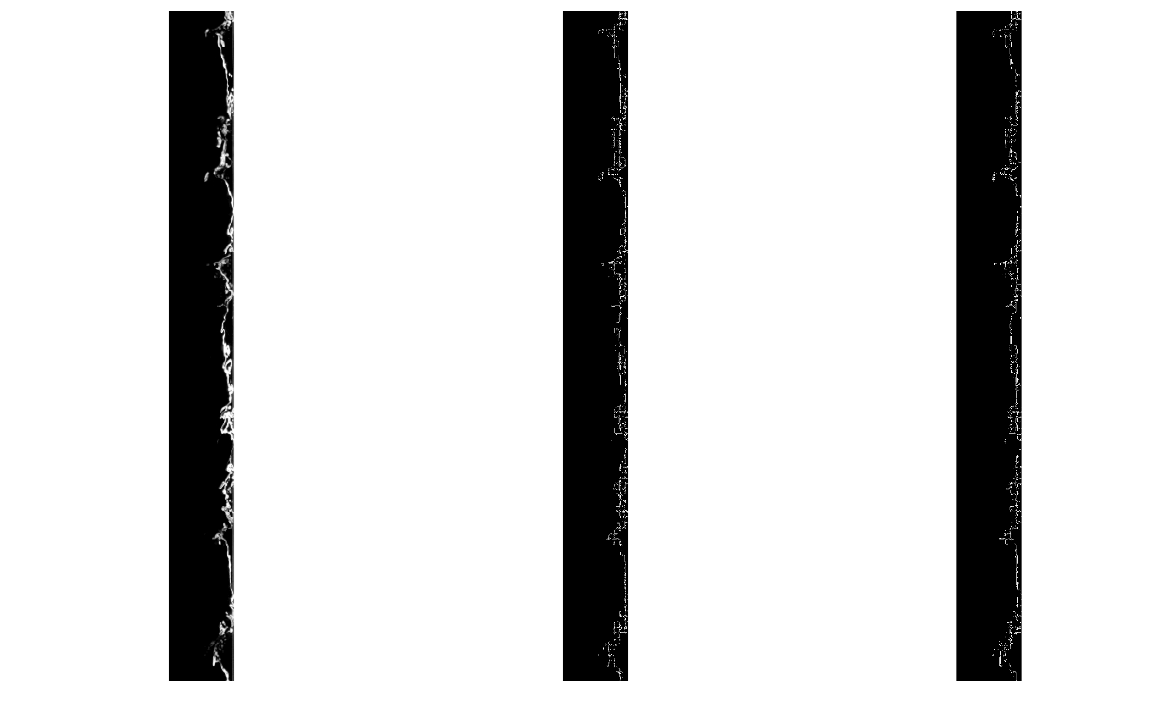

In [127]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,12),
                                   sharex=True, sharey=True)
im = color.rgb2gray(io.imread(r'C:\Users\JÃºlio\Documents\GitHub\image-analysis\images\seqa.png'))
im[:,0:408] = np.zeros((4950,408))
im = im[:,148:628]
ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=1.5,low_threshold=0.01,high_threshold=0.15)
ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')

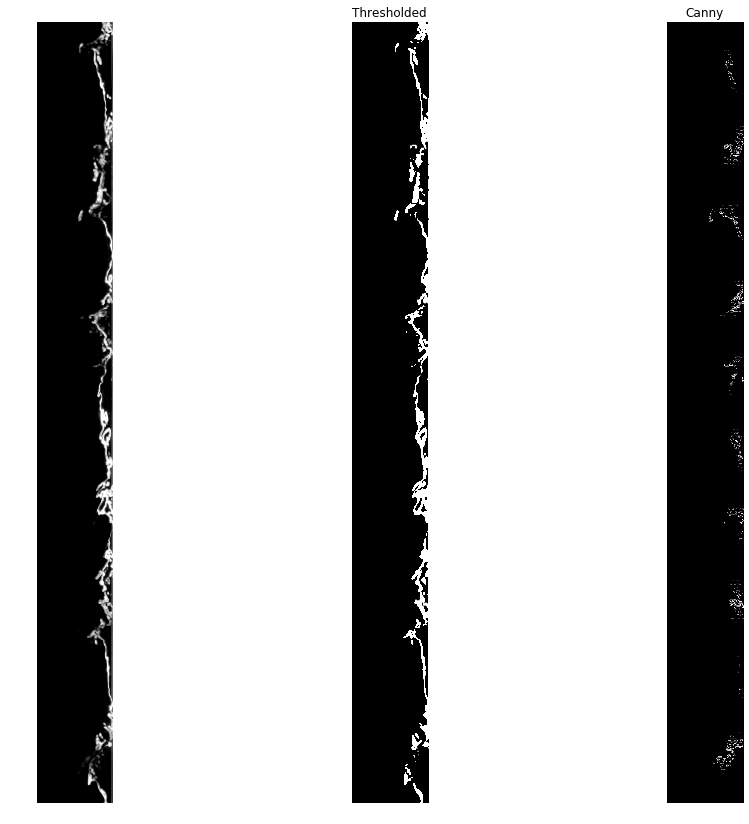

In [128]:
from skimage.filters import threshold_otsu

imcanny = feature.canny(im)
thresh = threshold_otsu(im)
binary = im > thresh

fig, axes = plt.subplots(ncols=3, figsize=(16, 14))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1, adjustable='box-forced')
ax[1] = plt.subplot(1, 3, 2, sharex=ax[0], sharey=ax[0], adjustable='box-forced')
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0], adjustable='box-forced')

ax[0].imshow(im, cmap=plt.cm.gray)
ax[0].axis('off')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Thresholded')
ax[1].axis('off')

ax[2].imshow(imcanny, cmap=plt.cm.gray)
ax[2].set_title('Canny')
ax[2].axis('off')

plt.show()